# Tourism in Kenya

In [461]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [462]:
# Set the path to the data
path = 'data/kenya_tourism_data.xlsx'

# Load the spreadsheets
xls = pd.ExcelFile(path)

# Print the sheet names
print(xls.sheet_names)

['Point_of_Entry', 'Top_Source_Market', 'Market Region', 'Purpose_of_Visit', 'Flight_Landings', 'Bed_Occupancy', 'Inbound_Earnings']


In [463]:
fonts = fm.findSystemFonts()

for font in fonts:
    fm.fontManager.addfont(font)

font_size = 12
# font_family = 'Space Mono'
# font_family = 'EB Garamond'
# font_family = 'Gotham'
font_family = 'Space Mono'
# plot_style = 'seaborn-v0_8-paper'
# plot_style = 'seaborn-v0_8-talk'
# plot_style = 'seaborn-v0_8-poster'
# plot_style = 'ggplot'
plot_style = '_mpl-gallery'
# plot_style = 'classic'
# plot_style = 'fivethirtyeight'
# plot_style = '_mpl-gallery-nogrid'

plt.style.use(plot_style)
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = font_size
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['figure.titlesize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 1
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.left'] = False
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
plt.rcParams['figure.constrained_layout.use'] = True

In [464]:
# Load the spreadsheets into dataframes
point_of_entry = xls.parse('Point_of_Entry')
point_of_entry.columns = point_of_entry.columns.str.lower()
top_source_markets = xls.parse('Top_Source_Market')
top_source_markets.columns = top_source_markets.columns.str.lower()
market_region = xls.parse('Market Region')
market_region.columns = market_region.columns.str.lower()
purpose_of_visit = xls.parse('Purpose_of_Visit')
purpose_of_visit.columns = purpose_of_visit.columns.str.lower()
flight_landings = xls.parse('Flight_Landings')
flight_landings.columns = flight_landings.columns.str.lower()
bed_occupancy = xls.parse('Bed_Occupancy')
bed_occupancy.columns = bed_occupancy.columns.str.lower()
inbound_earnings = xls.parse('Inbound_Earnings')
inbound_earnings.columns = inbound_earnings.columns.str.lower()

## Tourist Arrivals
---

### International Tourist Arrivals
International tourist arrivals are the number of tourists who travel to a country that is not their usual place of residence. The number of international tourist arrivals is an important economic indicator for the tourism industry as well as the entire country. It is used to measure the economic performance of the tourism industry and the country as a whole.

International tourist arrivals in 2022 saw a remarkable 70.45% increase from 2021. This is a significant increase and is a sign of the recovery of the tourism industry in Kenya. The number of international tourist arrivals in 2022 was 1,483,752, which is a significant increase from 2021, which had 870,465 international tourist arrivals.

In [465]:
point_of_entry['year'] = point_of_entry['year'].astype(str)
point_of_entry['month'] = point_of_entry['month'].astype(str)
point_of_entry['date'] = point_of_entry['year'] + '-' + point_of_entry['month']

point_of_entry['date'] = pd.to_datetime(point_of_entry['date'], format='%Y-%B') + pd.offsets.MonthEnd(0)

point_of_entry

,year,month,arrivals,point_of_entry,date
0,2018,January,105262,JKIA,2018-01-31
1,2018,February,98532,JKIA,2018-02-28
2,2018,March,100441,JKIA,2018-03-31
3,2018,April,94236,JKIA,2018-04-30
4,2018,May,93730,JKIA,2018-05-31
...,...,...,...,...,...
175,2022,August,27373,Other,2022-08-31
176,2022,September,33969,Other,2022-09-30
177,2022,October,32040,Other,2022-10-31
178,2022,November,31678,Other,2022-11-30


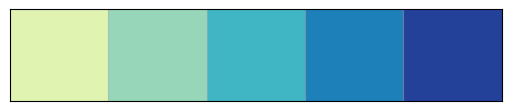

In [466]:
year_palette = sns.color_palette('YlGnBu', n_colors=5)
sns.palplot(year_palette)

In [467]:
# Filter the data to include only JKIA arrivals
jkia_arrivals = point_of_entry[point_of_entry['point_of_entry'] == 'JKIA']
mia_arrivals = point_of_entry[point_of_entry['point_of_entry'] == 'MIA']
other_arrivals = point_of_entry[point_of_entry['point_of_entry'] == 'Other']

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

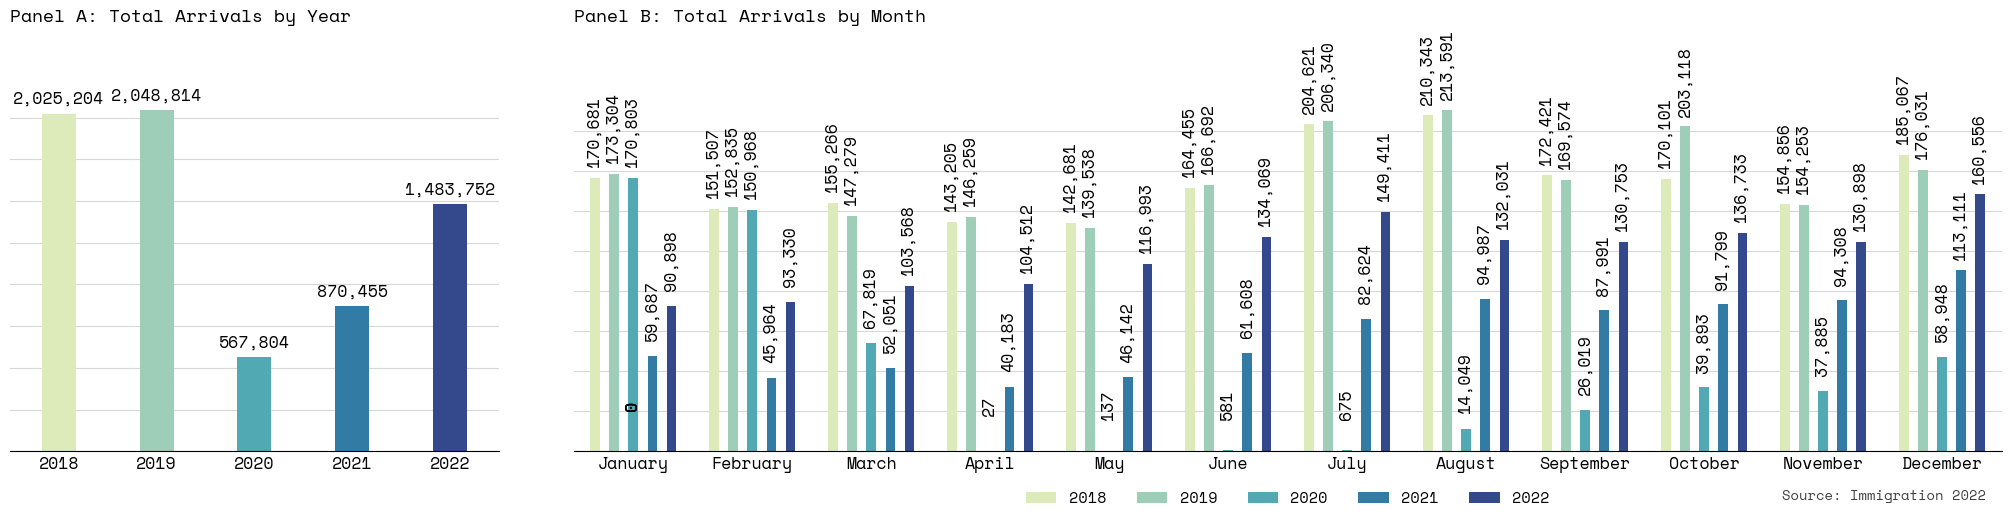

In [452]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [1.275, 3.725],
                                                           'wspace': 0.075})

sns.barplot(data=point_of_entry, x='year', y='arrivals', hue='year',
            width=0.35, palette=year_palette,
            estimator="sum", errorbar=None, ax=ax[0])
ax[0].set_title('Panel A: Total Arrivals by Year', loc='left', y=1.175)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_yticklabels([])
ax[0].spines[['top', 'right', 'left']].set_visible(False)

# for p in ax[0].patches:
#     ax[0].annotate(format(p.get_height(), ',.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, -35), fontsize=13, color='white',
#                    textcoords = 'offset points', fontweight='bold',
#                    rotation=90)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), ',.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

sns.barplot(data=point_of_entry, x='month', y='arrivals', hue='year',
            gap=0.5, palette=year_palette,
            estimator="sum", errorbar=None, ax=ax[1])
ax[1].set_title('Panel B: Total Arrivals by Month', loc='left', y=1.175)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_yticklabels([])
ax[1].spines[['top', 'right', 'left']].set_visible(False)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5, fontsize=11, frameon=False)

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), ',.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 33), 
                   textcoords = 'offset points',
                   rotation=90)

fig.text(0.99, 0.02, 'Source: Immigration 2022', fontsize=10, ha='right', va='bottom', alpha=0.75)

# handles, labels = ax[1].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.475, 0.975), ncol=5, fontsize=11)
# ax[1].get_legend().remove()
    
plt.show()

### Tourist Arrivals by Point of Entry
---
#### Jomo Kenyatta International Airport (JKIA)
Jomo Kenyatta International Airport (JKIA) served 1,062,762 arrivals, a 64.97% increase from 2021. The number of arrivals at JKIA in 2021 was 644,194.

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

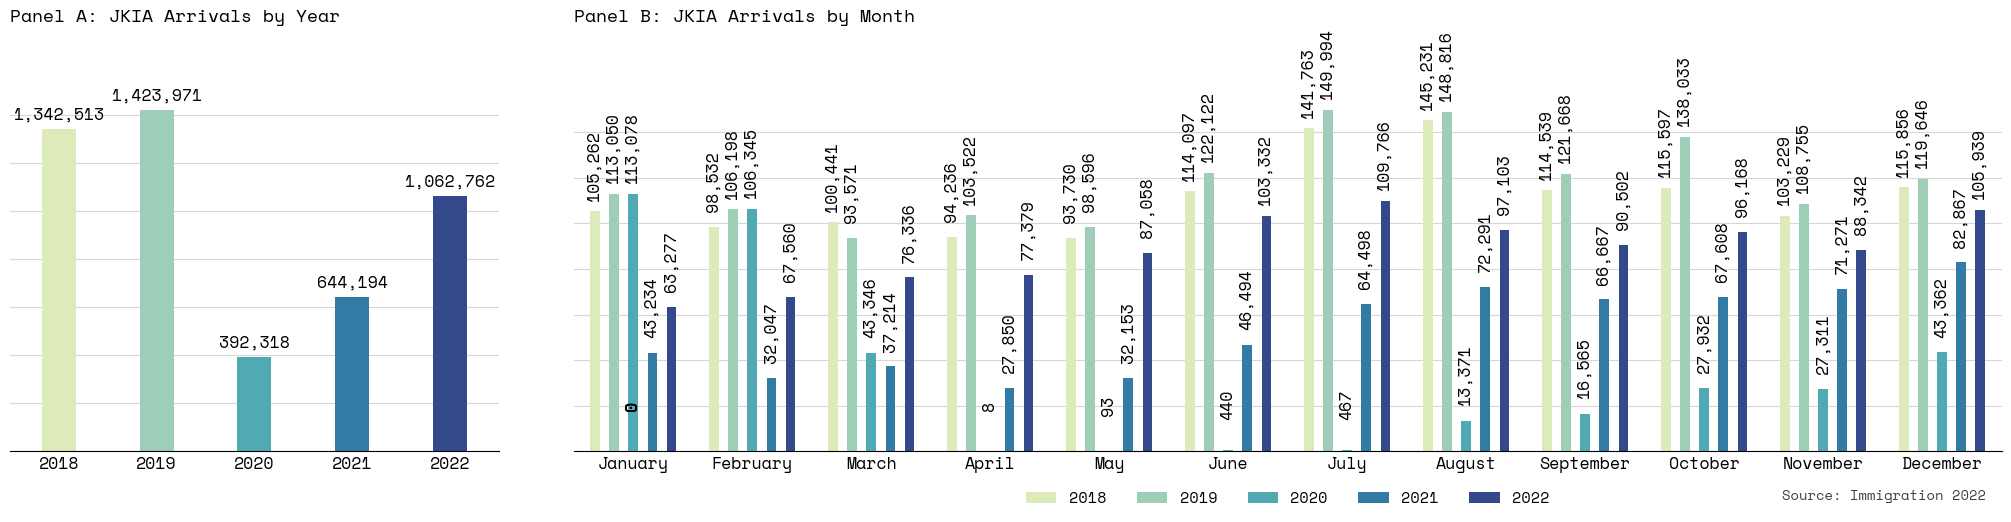

In [453]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [1.275, 3.725],
                                                           'wspace': 0.075})

sns.barplot(data=jkia_arrivals, x='year', y='arrivals', hue='year',
            width=0.35, palette=year_palette,
            estimator="sum", errorbar=None, ax=ax[0])
ax[0].set_title('Panel A: JKIA Arrivals by Year', loc='left', y=1.175)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_yticklabels([])
ax[0].spines[['top', 'right', 'left']].set_visible(False)

# for p in ax[0].patches:
#     ax[0].annotate(format(p.get_height(), ',.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, -35), fontsize=13, color='white',
#                    textcoords = 'offset points', fontweight='bold',
#                    rotation=90)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), ',.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

sns.barplot(data=jkia_arrivals, x='month', y='arrivals', hue='year',
            gap=0.5, palette=year_palette,
            estimator="sum", errorbar=None, ax=ax[1])
ax[1].set_title('Panel B: JKIA Arrivals by Month', loc='left', y=1.175)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_yticklabels([])
ax[1].spines[['top', 'right', 'left']].set_visible(False)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5, fontsize=11, frameon=False)

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), ',.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 33),
                   textcoords = 'offset points',
                   rotation=90)

fig.text(0.99, 0.02, 'Source: Immigration 2022', fontsize=10, ha='right', va='bottom', alpha=0.75)

# handles, labels = ax[1].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.475, 0.975), ncol=5, fontsize=11)
# ax[1].get_legend().remove()

plt.show()

#### Moi International Airport (MIA)

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

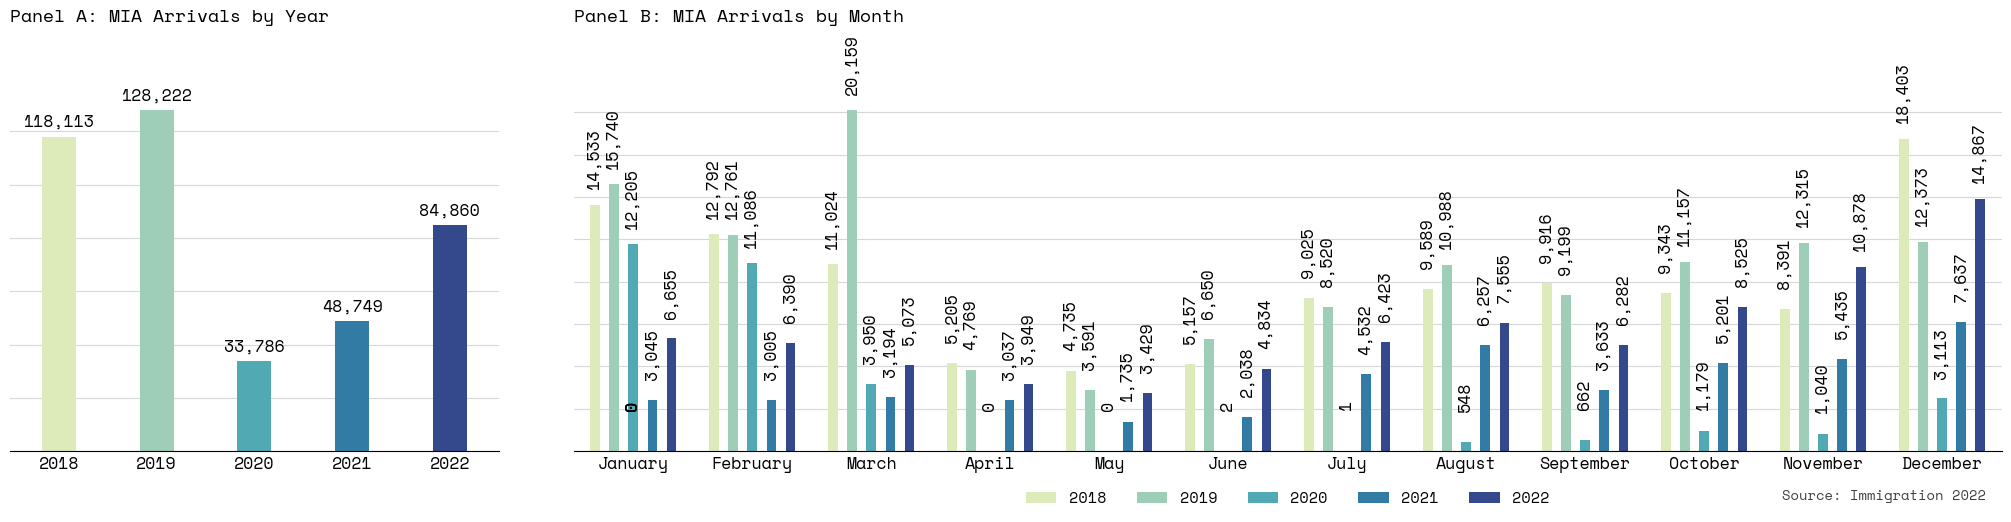

In [454]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [1.275, 3.725],
                                                           'wspace': 0.075})

sns.barplot(data=mia_arrivals, x='year', y='arrivals', hue='year',
            width=0.35, palette=year_palette,
            estimator="sum", errorbar=None, ax=ax[0])
ax[0].set_title('Panel A: MIA Arrivals by Year', loc='left', y=1.175)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_yticklabels([])
ax[0].spines[['top', 'right', 'left']].set_visible(False)

# for p in ax[0].patches:
#     ax[0].annotate(format(p.get_height(), ',.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, -35), fontsize=13, color='white',
#                    textcoords = 'offset points', fontweight='bold',
#                    rotation=90)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), ',.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

sns.barplot(data=mia_arrivals, x='month', y='arrivals', hue='year',
            gap=0.5, palette=year_palette,
            estimator="sum", errorbar=None, ax=ax[1])
ax[1].set_title('Panel B: MIA Arrivals by Month', loc='left', y=1.175)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_yticklabels([])
ax[1].spines[['top', 'right', 'left']].set_visible(False)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5, fontsize=11, frameon=False)

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), ',.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 33),
                   textcoords = 'offset points',
                   rotation=90)
    
fig.text(0.99, 0.02, 'Source: Immigration 2022', fontsize=10, ha='right', va='bottom', alpha=0.75)

# handles, labels = ax[1].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.475, 0.975), ncol=5, fontsize=11)
# ax[1].get_legend().remove()

plt.show()

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

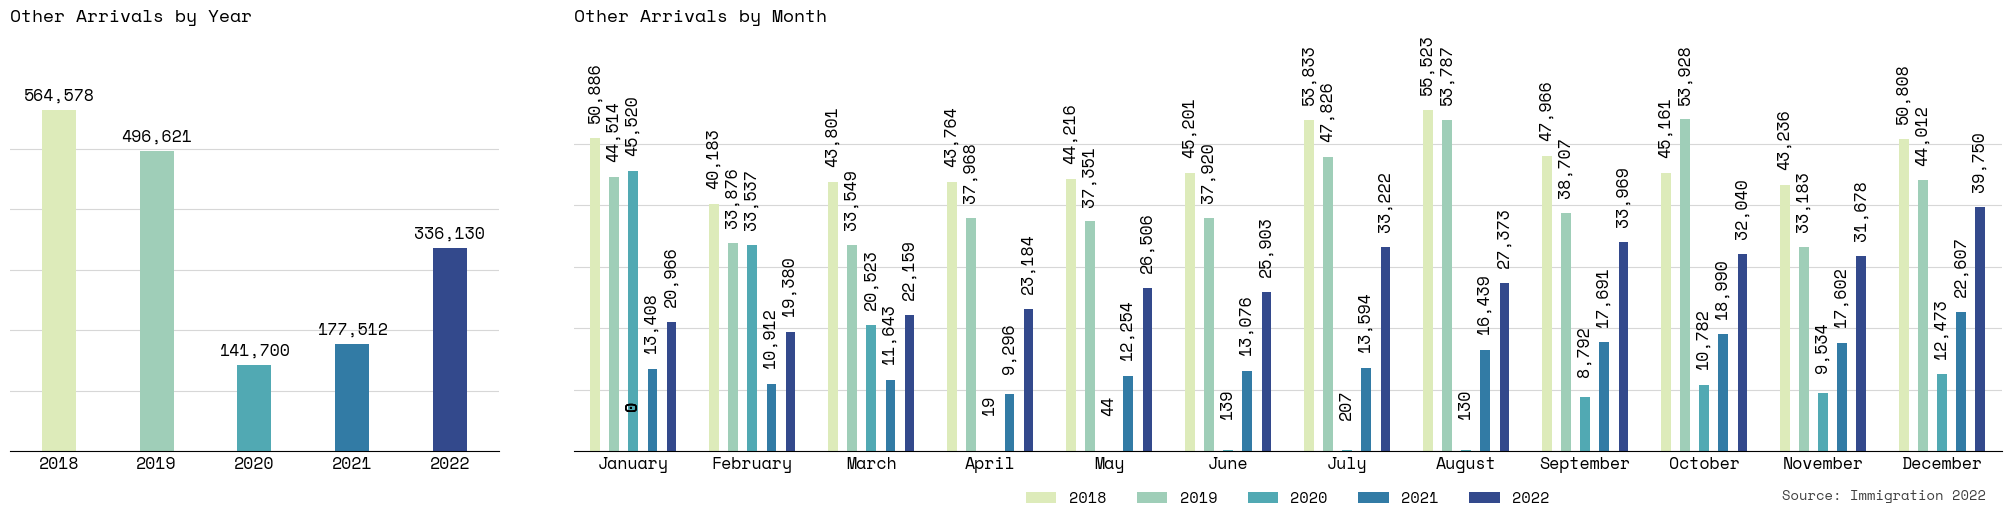

In [455]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [1.275, 3.725],
                                                           'wspace': 0.075})

sns.barplot(data=other_arrivals, x='year', y='arrivals', hue='year',
            width=0.35, palette=year_palette,
            estimator="sum", errorbar=None, ax=ax[0])
ax[0].set_title('Other Arrivals by Year', loc='left', y=1.175)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_yticklabels([])
ax[0].spines[['top', 'right', 'left']].set_visible(False)

# for p in ax[0].patches:
#     ax[0].annotate(format(p.get_height(), ',.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, -35), fontsize=13, color='white',
#                    textcoords = 'offset points', fontweight='bold',
#                    rotation=90)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), ',.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

sns.barplot(data=other_arrivals, x='month', y='arrivals', hue='year',
            gap=0.5, palette=year_palette,
            estimator="sum", errorbar=None, ax=ax[1])
ax[1].set_title('Other Arrivals by Month', loc='left', y=1.175)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_yticklabels([])
ax[1].spines[['top', 'right', 'left']].set_visible(False)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5, fontsize=11, frameon=False)

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), ',.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 33),
                   textcoords = 'offset points',
                   rotation=90)

fig.text(0.99, 0.02, 'Source: Immigration 2022', fontsize=10, ha='right', va='bottom', alpha=0.75)

# handles, labels = ax[1].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.475, 0.975), ncol=5, fontsize=11)
# ax[1].get_legend().remove()

plt.show()

### Source Markets
---

#### Top Source Markets

In [456]:
top_source_markets_22 = top_source_markets[top_source_markets['year'] == 2022]

top_source_markets_22

,year,top source_markets,arrivals
120,2022,USA,209360
121,2022,Uganda,151121
122,2022,UK,131526
123,2022,Tanzania,123836
124,2022,India,83106
125,2022,Germany,53498
126,2022,Rwanda,48232
127,2022,Somalia,40133
128,2022,Ethiopia,36581
129,2022,South Sudan,35760


<Axes: xlabel='top source_markets', ylabel='arrivals'>

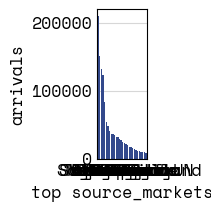

In [468]:
sns.barplot(data=top_source_markets_22, x='top source_markets', y='arrivals',
            estimator=sum, color=year_palette[-1])

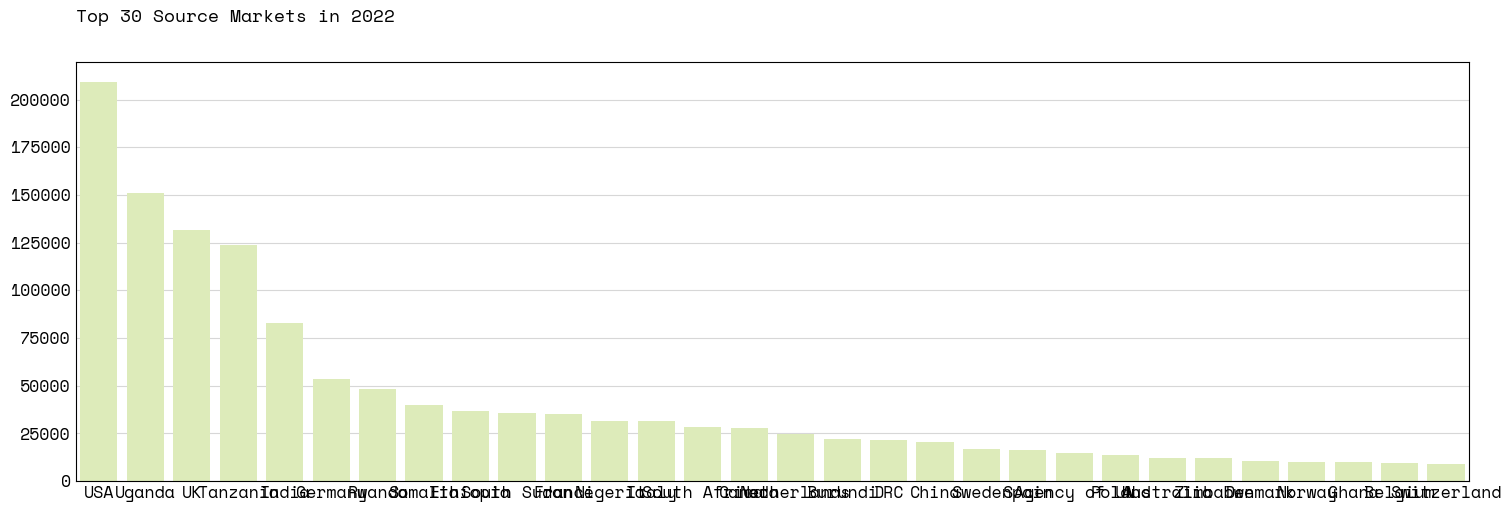

In [460]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(data=top_source_markets_22, x='top source_markets', y='arrivals',
            estimator=sum, color=year_palette[0], ax=ax)
ax.set_title('Top 30 Source Markets in 2022', loc='left', y=1.075)
ax.set_ylabel('')
ax.set_xlabel('')

plt.show()